In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression

In [2]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [ ]:
csv_path = '/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/product_info.csv'

df = pd.read_csv(csv_path)

df.head()

,year,product,url
0,2022,Famcal tablets,https://web.pharmacyboardkenya.org/famcal-tabl...
1,2022,Umbicare gel,https://web.pharmacyboardkenya.org/umbicare-gel/
2,2022,Tenofovir Disoproxil Fumarate/ Lamivudine/ Dol...,https://web.pharmacyboardkenya.org/tenofovir-d...
3,2022,Biodine Mouth Gargle,https://web.pharmacyboardkenya.org/biodine-mou...
4,2022,Rocephin Ig Injection,https://web.pharmacyboardkenya.org/rocephin-1g...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     74 non-null     int64 
 1   product  74 non-null     object
 2   url      74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [33]:
df.tail()

,year,product,url
69,2025,Shaltoux Herbal Cough Syrup,https://web.pharmacyboardkenya.org/shaltoux/
70,2025,APC Tablets,https://web.pharmacyboardkenya.org/apc-tablets/
71,2025,TBcide,https://web.pharmacyboardkenya.org/tbcide/
72,2025,Flurasted 500 Injection,https://web.pharmacyboardkenya.org/flurasted-500/
73,2025,Bisotrol Tablets,https://web.pharmacyboardkenya.org/bisotrol/


## Check number of records and missing values

In [34]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Shape: (74, 3)

Missing values:
 year       0
product    0
url        0
dtype: int64


## How many products were recalled each year?

<Axes: title={'center': 'Recalls per Year'}, xlabel='Year', ylabel='Count'>

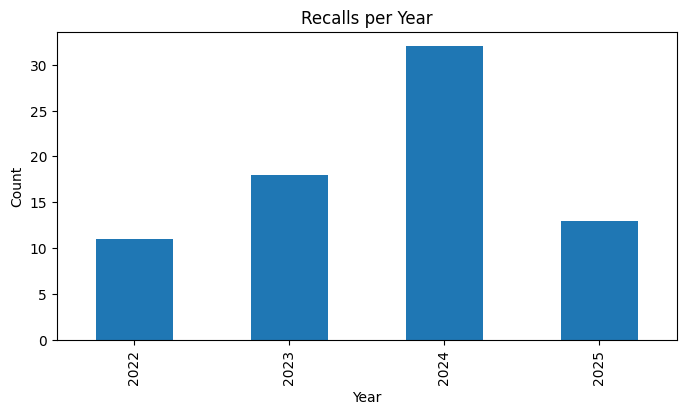

In [35]:
df['year'].value_counts().sort_index().plot(kind='bar', title="Recalls per Year", ylabel="Count", xlabel="Year", figsize=(8, 4))


## Duplicates check

In [36]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


## Top repeated products

In [37]:
df['product'].value_counts().head(10)


product
Painil Suspension                                                         2
Umbicare gel                                                              1
Tenofovir Disoproxil Fumarate/ Lamivudine/ Dolutegravir                   1
Biodine Mouth Gargle                                                      1
Rocephin Ig Injection                                                     1
EEATM Auto SutureTM Circular Stapler with DST SeriesTM Technology 25mm    1
Dawaflox DPS suspension 100ml                                             1
Biodopa tablets                                                           1
Famcal tablets                                                            1
Vasofix certo G24X19MM yellow                                             1
Name: count, dtype: int64

## Any missing or malformed URLs?

In [38]:
df['url'].isnull().sum()
df[df['url'].str.startswith("http") == False]  

,year,product,url
49,2024,AmoxiClav-Denk 1000/125mg powder for oral susp...,AmoxiClav-Denk%201000/125mg%20powder%20for%20o...


## Visualize trends

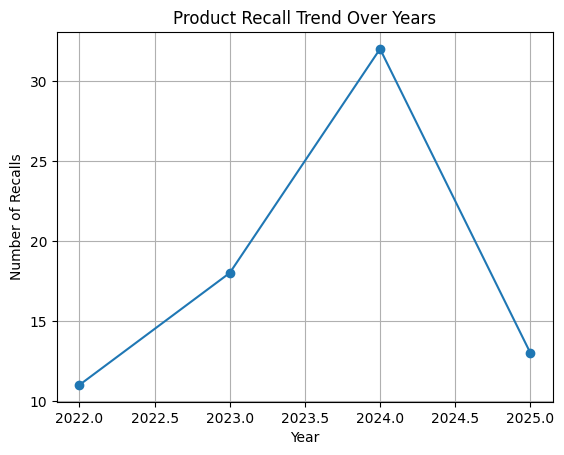

In [43]:
df['year'].value_counts().sort_index().plot(kind='line', marker='o', title="Product Recall Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Recalls")
plt.grid(True)
plt.show()

## Cumulative Recall Trend

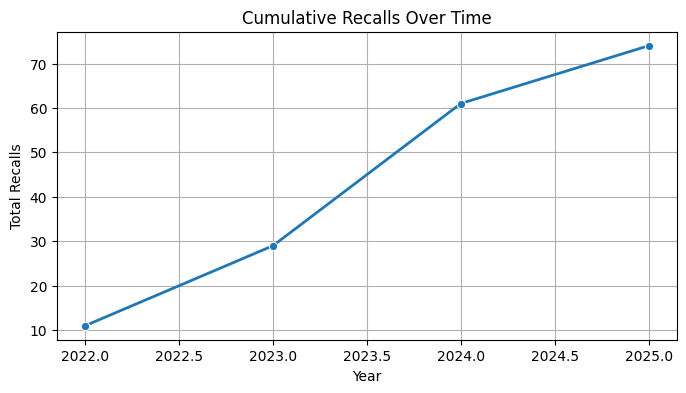

In [41]:
yearly_counts = df['year'].value_counts().sort_index()

cumulative = yearly_counts.cumsum()

plt.figure(figsize=(8, 4))
sns.lineplot(x=cumulative.index, y=cumulative.values, marker='o', linewidth=2)
plt.title("Cumulative Recalls Over Time")
plt.xlabel("Year")
plt.ylabel("Total Recalls")
plt.grid(True)
plt.show()


## Most Frequently Recalled Products

/tmp/ipykernel_59570/2618850257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="flare")


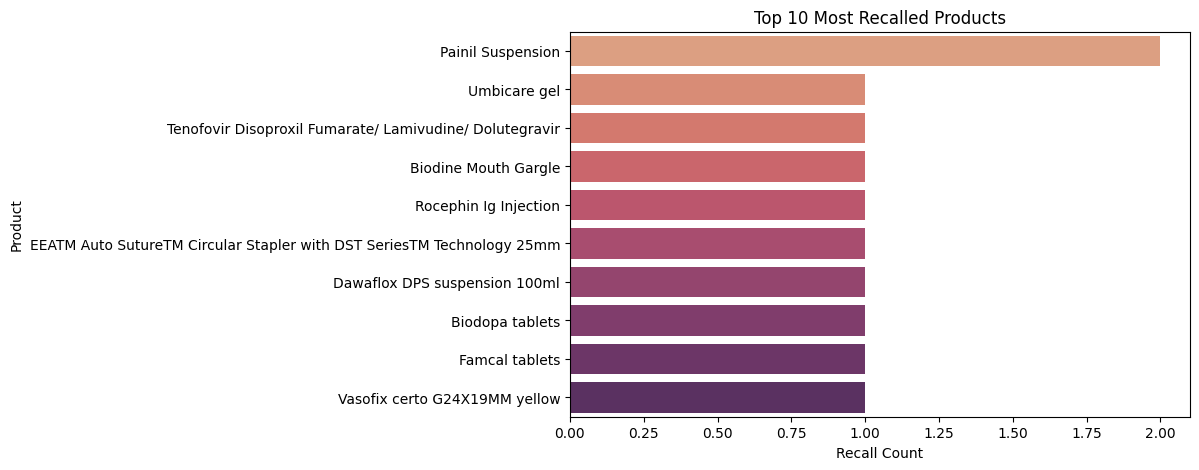

In [42]:
top_products = df['product'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_products.index, x=top_products.values, palette="flare")
plt.title("Top 10 Most Recalled Products")
plt.xlabel("Recall Count")
plt.ylabel("Product")
plt.show()


In [4]:
df = pd.read_csv("/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2016_2021.csv")

In [5]:
df

,year,date,product_name,inn_name,batch_no,manufacturer,reason
0,2016,11/12/2013,Biomol tablets,Paracetamol,All batches,Biodeal Laboratories Ltd,Color change and moulding
1,2016,24/09/2015,Beta gripe water,Gripe water,"11A, 2A, 6A, 7A, 11A",Beta Healthcare International,the batches had problems of floculation
2,2016,15/06/2016,OPVERO,Oral Polio Vaccine,M5169-1,Sanofi Aventis,To replace trivalent with bivalent OPV
3,2017,29/03/2017,Clopidogrel with Aspirin,Clopidogrel and Aspirin,E31614002,Unicure Remedies,"The product failed dissolution test, assay tes..."
4,2017,05/04/2017,Dulcolax 5mg,Bisacodyl,160697,Boehringer,Detected Out of specification for dissolution ...
...,...,...,...,...,...,...,...
73,2021,25/08/2021,Carbocysten-promethazine syrup,Carbocystein and promethazine,Several batches,Dawa Ltd,Voluntary recall due to fail of assay of FUST
74,2021,31/08/2021,Frusemide 40mg,Frusemide,"2105115, 2105116",Dawa Ltd,voluntary recall because of soft tablets
75,2021,27/09/2021,Zolex 400,Albendazole,ZOL803,NaN,The product failed dissolution test
76,2021,06/10/2021,Biotrim suspension,Trimethoprim suphamethoxazole,520094,Biodeal Laboratories Ltd,Color change


In [7]:
df = pd.read_csv("/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2022_2025.csv")

In [8]:
df

,year,date,recall_ref,product_name,inn_name,batch_no,manufacturer,reason
0,2022,14/12/2022,REC/2022/011,Famcal tablets,Calcium citrate maleate with Cholecalciferol,FDF1AD3B,"Indoco Remedies Limited, India",Out of specification results on assay test ide...
1,2022,13/12/2022,REC/2022/010,Umbicare gel,Chlorhexidine Gluconate Gel 7.1% w/w,UAM1IC1B,"Indoco Remedies Limited, India",Out Of Specification results on related substa...
2,2022,07/12/2022,REC/2022/009,Tenofovir Disoproxil Fumarate/ Lamivudine/ Dol...,Tenofovir Disoproxil Fumarate/ Lamivudine/ Dol...,Several,"Universal Corporation Limited, Kenya","Discoloration of induction seal, broken tablet..."
3,2022,12/09/2022,REC/2022/008,Biodine Mouth Gargle,Povidone Iodine,"0122081, 0122082, 0322054, 0322055, 0322056, 0...","Biodeal Laboratories Ltd, Kenya",Change of color to colorless
4,2022,01/07/2022,REC/2022/007,Rocephin Ig Injection,Ceftriaxone 1g,B0752B04,"F. Hoffmann-La Roche Ltd, Kaiseraugst",Detection of pinholes in 10 mL Water for Injec...
...,...,...,...,...,...,...,...,...
69,2025,10/03/2025,REC/2025/005,Shaltoux Herbal Cough Syrup,"Diphenhydramine Hydrochloride, Ammonium Chlori...",24011,"Gopaldas Visram & Company Limited, India",Market complaints of presence particulate matt...
70,2025,07/02/2025,REC/2025/004,APC Tablets,"Paracetamol 250mg, Aspirin 150mg & Caffeine 30mg",1223038,"Biodeal Laboratories Ltd, Kenya",Out-of-Specification results on uniformity of ...
71,2025,16/01/2025,REC/2025/003,TBcide,Sodium Hypochlorite Solution,24052101A2 and 24052201A2,Kenya Medical Research Institute (KEMRI),Lack of the characteristic color and smell and...
72,2025,06/01/2025,REC/2025/002,Flurasted 500 Injection,5-Fluorouracil,HHP2401,"Halsted Pharma Private Limited, India",Detection of particles in the product.


## EDA recalls 2016-2022

In [4]:
df =pd.read_csv("/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2016_2021.csv")

In [5]:
df

,year,date,product_name,inn_name,batch_no,manufacturer,reason
0,2016,11/12/2013,Biomol tablets,Paracetamol,All batches,Biodeal Laboratories Ltd,Color change and moulding
1,2016,24/09/2015,Beta gripe water,Gripe water,"11A, 2A, 6A, 7A, 11A",Beta Healthcare International,the batches had problems of floculation
2,2016,15/06/2016,OPVERO,Oral Polio Vaccine,M5169-1,Sanofi Aventis,To replace trivalent with bivalent OPV
3,2017,29/03/2017,Clopidogrel with Aspirin,Clopidogrel and Aspirin,E31614002,Unicure Remedies,"The product failed dissolution test, assay tes..."
4,2017,05/04/2017,Dulcolax 5mg,Bisacodyl,160697,Boehringer,Detected Out of specification for dissolution ...
...,...,...,...,...,...,...,...
73,2021,25/08/2021,Carbocysten-promethazine syrup,Carbocystein and promethazine,Several batches,Dawa Ltd,Voluntary recall due to fail of assay of FUST
74,2021,31/08/2021,Frusemide 40mg,Frusemide,"2105115, 2105116",Dawa Ltd,voluntary recall because of soft tablets
75,2021,27/09/2021,Zolex 400,Albendazole,ZOL803,NaN,The product failed dissolution test
76,2021,06/10/2021,Biotrim suspension,Trimethoprim suphamethoxazole,520094,Biodeal Laboratories Ltd,Color change


### drugs recalled each year

<Axes: title={'center': 'Number of Recalls per Drug'}, xlabel='Drug Name', ylabel='Number of Recalls'>

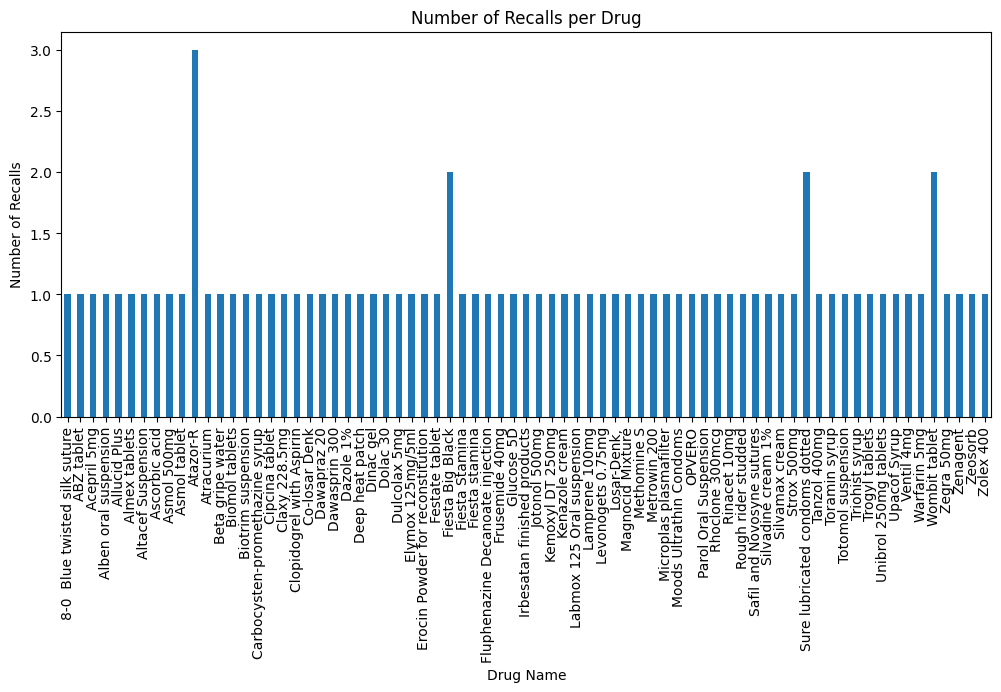

In [8]:
df['product_name'].value_counts().sort_index().plot(
    kind='bar',
    title="Number of Recalls per Drug",
    xlabel="Drug Name",
    ylabel="Number of Recalls",
    figsize=(12, 5)
)


### cummulative trends

In [9]:
drug_counts = df['product_name'].value_counts().sort_index()

In [10]:
cumulative = drug_counts.cumsum()

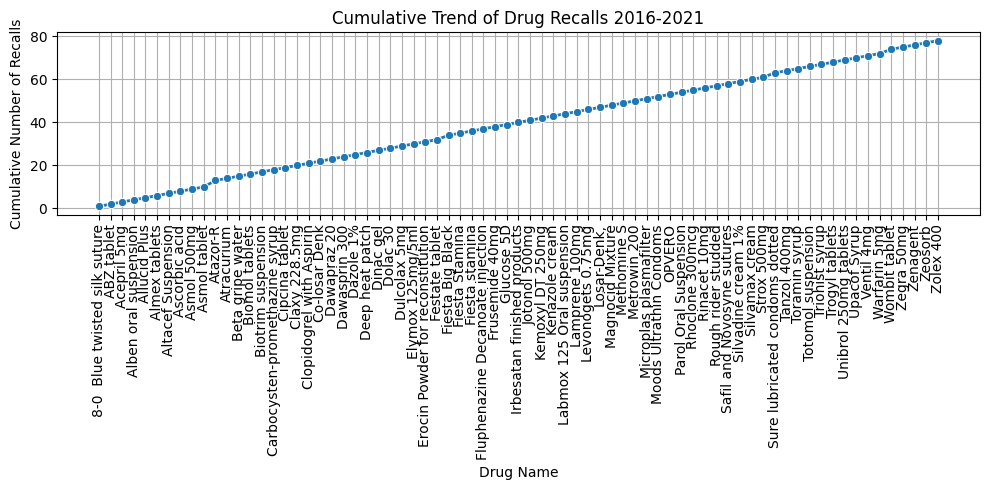

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=cumulative.index, y=cumulative.values, marker='o', linewidth=2)
plt.title('Cumulative Trend of Drug Recalls 2016-2021')
plt.xlabel('Drug Name')
plt.ylabel('Cumulative Number of Recalls')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### most appearing

In [13]:
top_recall = df['product_name'].value_counts().head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

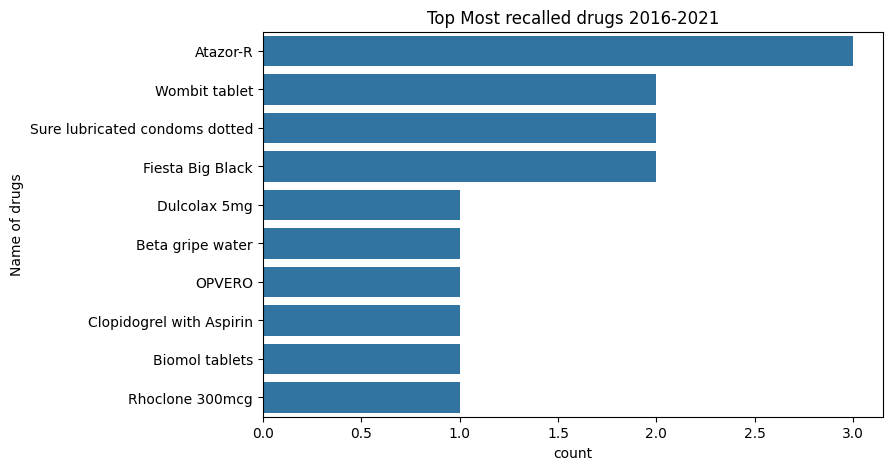

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(y=top_recall.index, x=top_recall.values)
palette=("flare")
plt.title("Top Most recalled drugs 2016-2021")
plt.xlabel("count")
plt.ylabel("Name of drugs")
plt.show

## Top Recalled Drugs (by INN name)

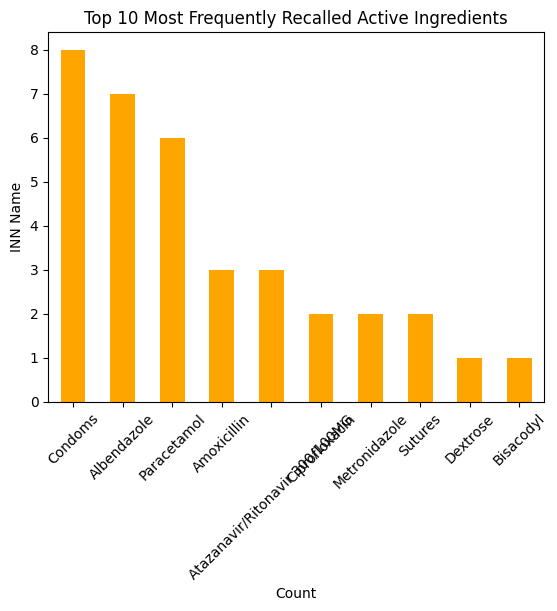

In [18]:
df['inn_name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequently Recalled Active Ingredients')
plt.xlabel('Count')
plt.ylabel('INN Name')
plt.xticks(rotation=45)
plt.show()


# 2022 to 2025

In [19]:
df =pd.read_csv("/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2022_2025.csv")

In [20]:
df

,year,date,recall_ref,product_name,inn_name,batch_no,manufacturer,reason
0,2022,14/12/2022,REC/2022/011,Famcal tablets,Calcium citrate maleate with Cholecalciferol,FDF1AD3B,"Indoco Remedies Limited, India",Out of specification results on assay test ide...
1,2022,13/12/2022,REC/2022/010,Umbicare gel,Chlorhexidine Gluconate Gel 7.1% w/w,UAM1IC1B,"Indoco Remedies Limited, India",Out Of Specification results on related substa...
2,2022,07/12/2022,REC/2022/009,Tenofovir Disoproxil Fumarate/ Lamivudine/ Dol...,Tenofovir Disoproxil Fumarate/ Lamivudine/ Dol...,Several,"Universal Corporation Limited, Kenya","Discoloration of induction seal, broken tablet..."
3,2022,12/09/2022,REC/2022/008,Biodine Mouth Gargle,Povidone Iodine,"0122081, 0122082, 0322054, 0322055, 0322056, 0...","Biodeal Laboratories Ltd, Kenya",Change of color to colorless
4,2022,01/07/2022,REC/2022/007,Rocephin Ig Injection,Ceftriaxone 1g,B0752B04,"F. Hoffmann-La Roche Ltd, Kaiseraugst",Detection of pinholes in 10 mL Water for Injec...
...,...,...,...,...,...,...,...,...
69,2025,10/03/2025,REC/2025/005,Shaltoux Herbal Cough Syrup,"Diphenhydramine Hydrochloride, Ammonium Chlori...",24011,"Gopaldas Visram & Company Limited, India",Market complaints of presence particulate matt...
70,2025,07/02/2025,REC/2025/004,APC Tablets,"Paracetamol 250mg, Aspirin 150mg & Caffeine 30mg",1223038,"Biodeal Laboratories Ltd, Kenya",Out-of-Specification results on uniformity of ...
71,2025,16/01/2025,REC/2025/003,TBcide,Sodium Hypochlorite Solution,24052101A2 and 24052201A2,Kenya Medical Research Institute (KEMRI),Lack of the characteristic color and smell and...
72,2025,06/01/2025,REC/2025/002,Flurasted 500 Injection,5-Fluorouracil,HHP2401,"Halsted Pharma Private Limited, India",Detection of particles in the product.


## Most Common Recall Reasons

/tmp/ipykernel_1046/4173497751.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


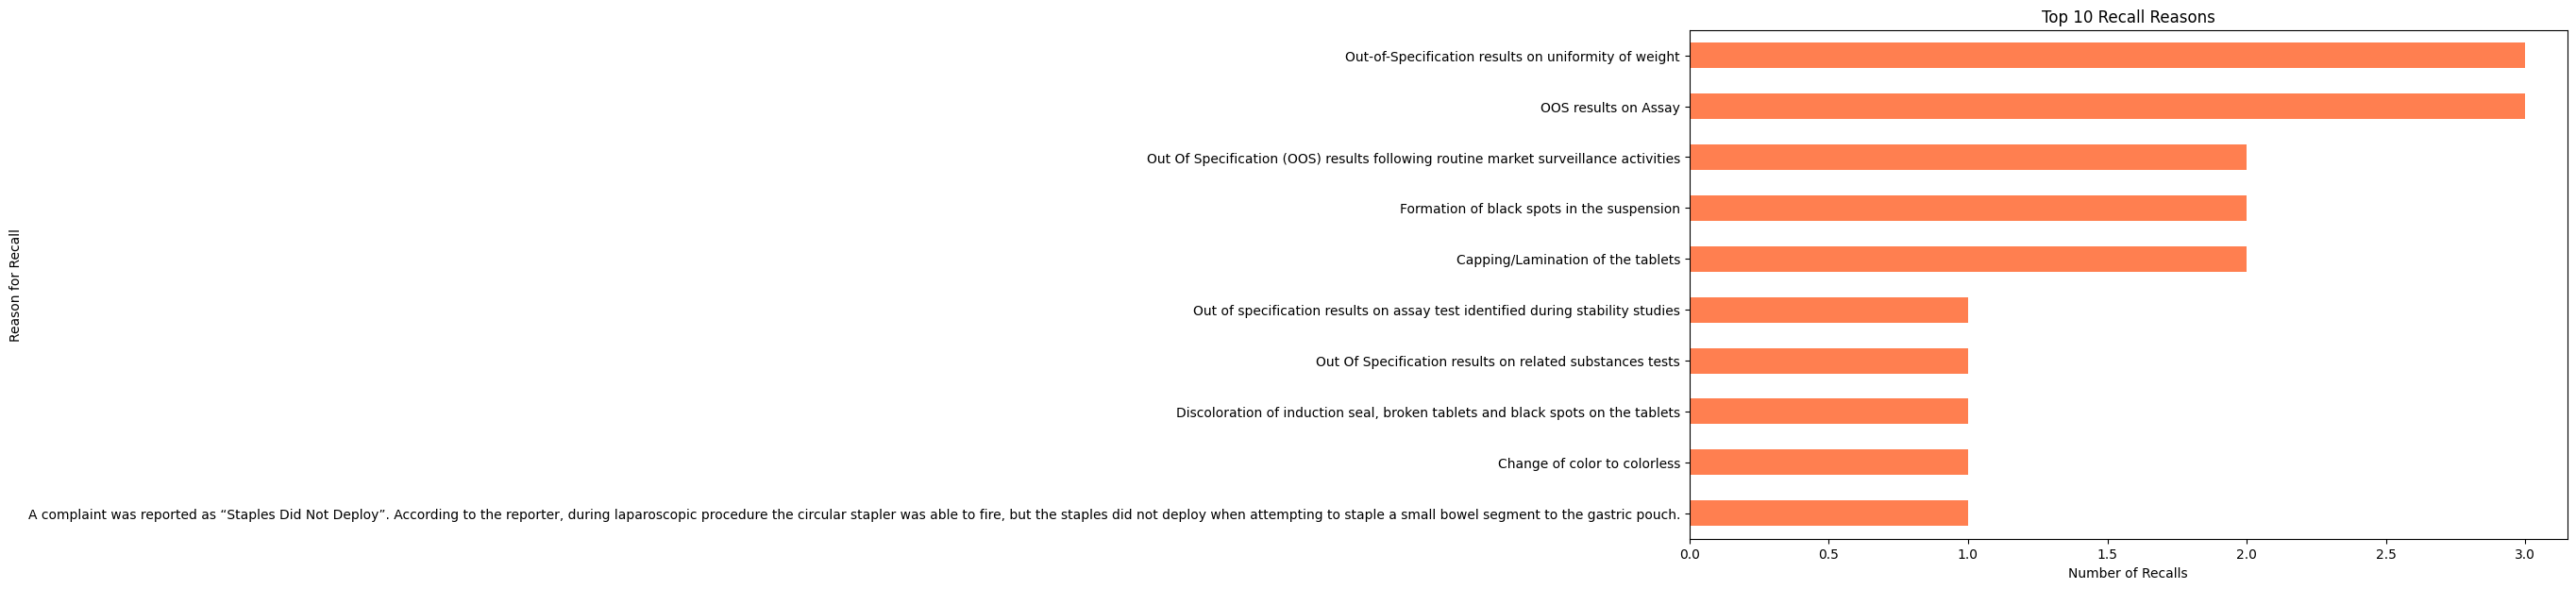

Top 10 Recall Reasons:
reason
Out-of-Specification results on uniformity of weight                                                                                                                                                                                                          3
OOS results on Assay                                                                                                                                                                                                                                          3
Out Of Specification (OOS) results following routine market surveillance activities                                                                                                                                                                           2
Formation of black spots in the suspension                                                                                                                                                                

In [23]:
plt.figure(figsize=(12, 7))
df['reason'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Recall Reasons')
plt.xlabel('Number of Recalls')
plt.ylabel('Reason for Recall')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 Recall Reasons:")
print(df['reason'].value_counts().head(10))


## Recalls Over Time (by Year)

In [26]:
print(df.columns.tolist())


['year', 'date', 'recall_ref', 'product_name', 'inn_name', 'batch_no', 'manufacturer', 'reason']


In [29]:
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          74 non-null     int64 
 1   date          74 non-null     object
 2   recall_ref    74 non-null     object
 3   product_name  74 non-null     object
 4   inn_name      74 non-null     object
 5   batch_no      74 non-null     object
 6   manufacturer  74 non-null     object
 7   reason        74 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.8+ KB
None
               year        date    recall_ref       product_name  \
count     74.000000          74            74                 74   
unique          NaN          60            74                 73   
top             NaN  18/09/2023  REC/2022/011  Painil Suspension   
freq            NaN           4             1                  2   
mean    2023.635135         NaN           NaN                NaN   
std        0.94

## combining datasets

In [5]:


files = [
    "/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2016_2021.csv",
    "/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2022_2025.csv",
    "/home/mocha/respos/drug_recall_ml/ppb_recalls/data/csv/recalls_2025_april.csv"
]

dfs = []
for f in files:
    df = pd.read_csv(f)


    if ("2022_2025" in f or "2025_april" in f) and "recall_ref" in df.columns:
        df = df.drop(columns=["recall_ref"])

    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

data.to_csv("all_recalls_clean.csv", index=False)

print(" Combined CSV created: all_recalls_clean.csv")


 Combined CSV created: all_recalls_clean.csv


### Aggregate recalls by year

In [6]:
yearly_recalls = data.groupby("year").size().reset_index(name="recall_count")

In [ ]:

X = yearly_recalls[["year"]]   
y = yearly_recalls["recall_count"]  

In [ ]:

model = LinearRegression()
model.fit(X, y)

print("Slope (trend):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (trend): 2.175757575757576
Intercept: -4379.2181818181825


# 3 Make Predictions

In [ ]:

yearly_recalls["predicted"] = model.predict(X)

future_years = pd.DataFrame({"year": np.arange(2026, 2031)})
future_years["predicted"] = model.predict(future_years)

print(future_years)


NameError: name 'np' is not defined

# Predict existing years
yearly_recalls["predicted"] = model.predict(X)

# Predict future years (say 2026–2030)
future_years = pd.DataFrame({"year": np.arange(2026, 2031)})
future_years["predicted"] = model.predict(future_years)

print(future_years)


## preparing the data for ML al